In [23]:
from PIL import Image
import glob
import matplotlib.pyplot as plt
import os

# 데이터 불러오기 & Resize

In [24]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")
    print(len(images), " images to be resized.")
    target_size=(28,28)
    
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    print(len(images), " images resized.")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

2410  images to be resized.
2410  images resized.
가위 이미지 resize 완료!


In [25]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

2601  images to be resized.
2601  images resized.


In [27]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

1603  images to be resized.
1603  images resized.


In [29]:
import numpy as np

def load_data(img_path, number_of_data=6614): #갯수 맞추기
    img_size=28 
    color=3 #흑백=1,칼라=3
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0 

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 6614 입니다.
x_train shape: (6614, 28, 28, 3)
y_train shape: (6614,)


라벨:  0


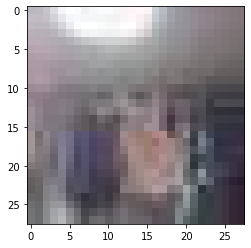

In [30]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

# 딥러닝 네트워크 설계하기

In [31]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model = keras.models.Sequential()

model.add(keras.layers.Conv2D(128, (3,3), activation = 'relu', input_shape = (28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(256, (3,3), activation = 'relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation = 'relu'))
model.add(keras.layers.Dense(3, activation = 'softmax'))
model.summary()

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#model.fit(x_train, y_train, epochs=10)
#model.fit(x_train, y_train, epochs=6)
model.fit(x_train, y_train, epochs=13)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 128)       3584      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 256)       295168    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 256)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               3277312   
_________________________________________________________________
dense_7 (Dense)              (None, 3)                

In [32]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

#model.fit(x_train, y_train, epochs=10)
#model.fit(x_train, y_train, epochs=8)
model.fit(x_train, y_train, epochs=6)

Epoch 1/6
207/207 [==============================] - 1s 5ms/step - loss: 0.0864 - accuracy: 0.9732
Epoch 2/6
207/207 [==============================] - 1s 4ms/step - loss: 0.0703 - accuracy: 0.9797
Epoch 3/6
207/207 [==============================] - 1s 4ms/step - loss: 0.0564 - accuracy: 0.9803
Epoch 4/6
207/207 [==============================] - 1s 4ms/step - loss: 0.0572 - accuracy: 0.9852
Epoch 5/6
207/207 [==============================] - 1s 4ms/step - loss: 0.0565 - accuracy: 0.9849
Epoch 6/6
207/207 [==============================] - 1s 4ms/step - loss: 0.0214 - accuracy: 0.9932


# 테스트(검증)

In [33]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")
    print(len(images), " images to be resized.")
    target_size=(28,28)
    
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    print(len(images), " images resized.")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor/"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [34]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [35]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)
print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [36]:
def load_data(img_path, number_of_data=300):
    img_size=28
    color=3
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img   
        labels[idx]=1   # 바위
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img  
        labels[idx]=2   # 보 
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [37]:
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose = 2)

print('test_loss:{}'.format(test_loss))
print('test_accuracy : {}'.format(test_accuracy))

10/10 - 0s - loss: 1.1324 - accuracy: 0.6433
test_loss:1.1324288845062256
test_accuracy : 0.6433333158493042


In [4]:
#------------------------------------------------------------------------------------

# 회고


첫 익스플로레이션은 'RockScissorPaper'과 '인공지능'에 관해 다뤘습니다.

우선 AI전문가가 되기 위한 첫 발자국으로 익숙하지 않은 것을 해본다는 것에서 재밌게 작업했습니다.
하지만, 모르는 부분에 있어 단순히 복사-붙여넣기 일명 복붙이 아니라 최대한 배우려고
노력했습니다.

그러다 보니 5번은 다시 한 것같은데 결론적으로 64.3%정도로 정확도가 나왔습니다.
처음 정확도가 24%정도 였고 34%, 46% 54%를 거쳐서 이룬 성과다 보니 꽤 만족했습니다.

먼저, 24%의 정확도가 나왔던 이유는 데이터의 양이 너무나도 부족했기 때문이었습니다.
연습용으로 300장, 테스트용으로 100장을 이용했습니다.
이에 팀원들의 피드백을 듣고서 양을 늘리게 되었습니다.

34%를 달성했을 때는 900장의 연습용과 300장의 테스트용을 활용했습니다.
여전히 학습 데이터가 부족했다고 판단한여 한 번 더 진행했습니다.

46%에는 호기심이 생겼습니다.
그래서 연습용 데이터에 900장만 넣어보고 테스트용 데이터에는 4400장이나 넣어봤습니다.
예상으로는 크게 차이가 없을 줄 알았지만, 실제로는 낮은 정확도를 띄었습니다.
이때 8:2정도의 비율이 좋다는 것도 배울 수 있었고, 한 번 더 연습의 기회가 되었습니다.

54%가 나왔을 때는 조금 지쳐있었기에 각각 2000장과 300장 정도를 이용해 진행했습니다.
역시 60%의 정확도에 미치지 못했지만, 어떻게 보면 이것 또한 실험었다고 생각합니다.

결국에는 64.3%가 나왔습니다.
종합적으로 목표를 달성하는 과정에서 resize, 이미지 개수, colour, epoch 등에 관한 실수도 했습니다.
다만, 흔히 사용하지만 저는 최근에야 들어본 '백문이 불여일타'라는 가치를 알았고, 실수로써 디테일을 배울 수 있었습니다.
